In [10]:
# stats:
import numpy as np
from scipy import stats
from scipy.stats import norm

# plotting and images:
import matplotlib.pyplot as plt
from IPython.display import Image

# supress warnings:
import warnings
warnings.filterwarnings("ignore")

---
## About this chapter:
This chapter explores the "long odds" of underdogs winning by considering the true probabilistic chance of winning as opposed to popular opinion.

Chapter 3 of the book considers a coupke of cases, out of which we study two: #16 seed UMBC beating #1 seed Virginia at the NCAA Men's Basketball tournament, and the NY Jets winning Superbowl III over the Colts.

The probability of both of these results can be approximated using a normal random variable using the points spread (mean and standard deviation) as given by the betting industry (oddsmakers).

---
### The code for the CDF of a normal distribution that returns the probability of a given event:

In [2]:
def get_single_event_proba(sample_mean, sample_std, value_to_predict):
    sample_mean = sample_mean
    sample_std = sample_std
    
    # cdf below and including value:
    value_to_predict = value_to_predict

    # set lower and upper bound for the distribution (5 standard deviations above and below the mean):
    dist_lower_bound = sample_mean - 5*sample_std
    dist_upper_bound = sample_mean + 5*sample_std

    # sample points for the distribution using the specified parameters:
    dist_values = np.arange(dist_lower_bound, dist_upper_bound, 0.01)

    # get probability (cdf)
    pdf = stats.norm.pdf(dist_values, sample_mean, sample_std)
    plt.plot(dist_values, pdf)

    # "between" parameters: 
    low = dist_lower_bound
    high = value_to_predict

    # fill area under the points and plot:
    plt.fill_between(dist_values, pdf, where=(low < dist_values) & (dist_values < high))
    plt.show()

    #Probability of pred:
    event_proba = norm(loc=sample_mean, scale=sample_std).cdf(value_to_predict)
    message = f"The probability of the event is: {round(event_proba, 3)}"
    
    return message

---
### The code for the CDF of a normal distribution that returns the probability of a given event between two values:

In [6]:
def get_between_events_proba(sample_mean, sample_std, lower_value, upper_value):
    # distribution parameters:
    sample_mean = sample_mean
    sample_std = sample_std

    # set lower and upper bound for the distribution (5 standar deviations above and below the mean):
    dist_lower_bound = sample_mean - 5*sample_std
    dist_upper_bound = sample_mean + 5*sample_std

    # sample points for the distribution using the specified parameters:
    dist_values = np.arange(dist_lower_bound, dist_upper_bound, 0.01)

    # get probability (cdf)
    pdf = stats.norm.pdf(dist_values, sample_mean, sample_std)
    plt.plot(dist_values, pdf)

    # "between" parameters: 
    low = lower_value
    high = upper_value

    # fill area under the points and plot:
    plt.fill_between(dist_values, pdf, where=(low < dist_values) & (dist_values < high))
    plt.show()

    # probability of event (cdf between points):
    cdf_upper_limit = norm(loc=sample_mean, scale=sample_std).cdf(upper_value)
    cdf_lower_limit = norm(loc=sample_mean, scale=sample_std).cdf(lower_value)
    between_prob = cdf_upper_limit - cdf_lower_limit
    message = f"The probability of the event is: {round(between_prob, 3)}"
    
    return message

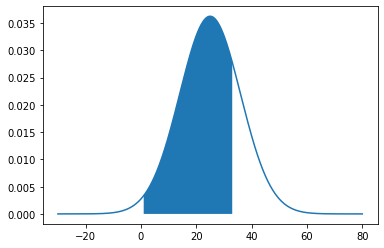

'The probability of the event is: 0.752'

In [16]:
# sample:
get_between_events_proba(sample_mean=25, sample_std=11, lower_value=1, upper_value=33)

---
### Case 1:  #16 seed UMBC beats #1 seed Virginia at the NCAA Men's Basketball tournament
According to the text, from 1985 to 2017, #16 seeds lost to #1 seeds in ALL 132 games played. In 2018, however, UMBC upset the favorites Virginia and eliminated them from the tournament. 

On average, #16 seeds lost #1 seeds by 25 points, with a standard deviation about the mean of 11 points. These parameters (mean = 25pts, std = 11pts) will be used to model the probability of the upset by approximating it using a normal random variable.

How likely was the observed result?

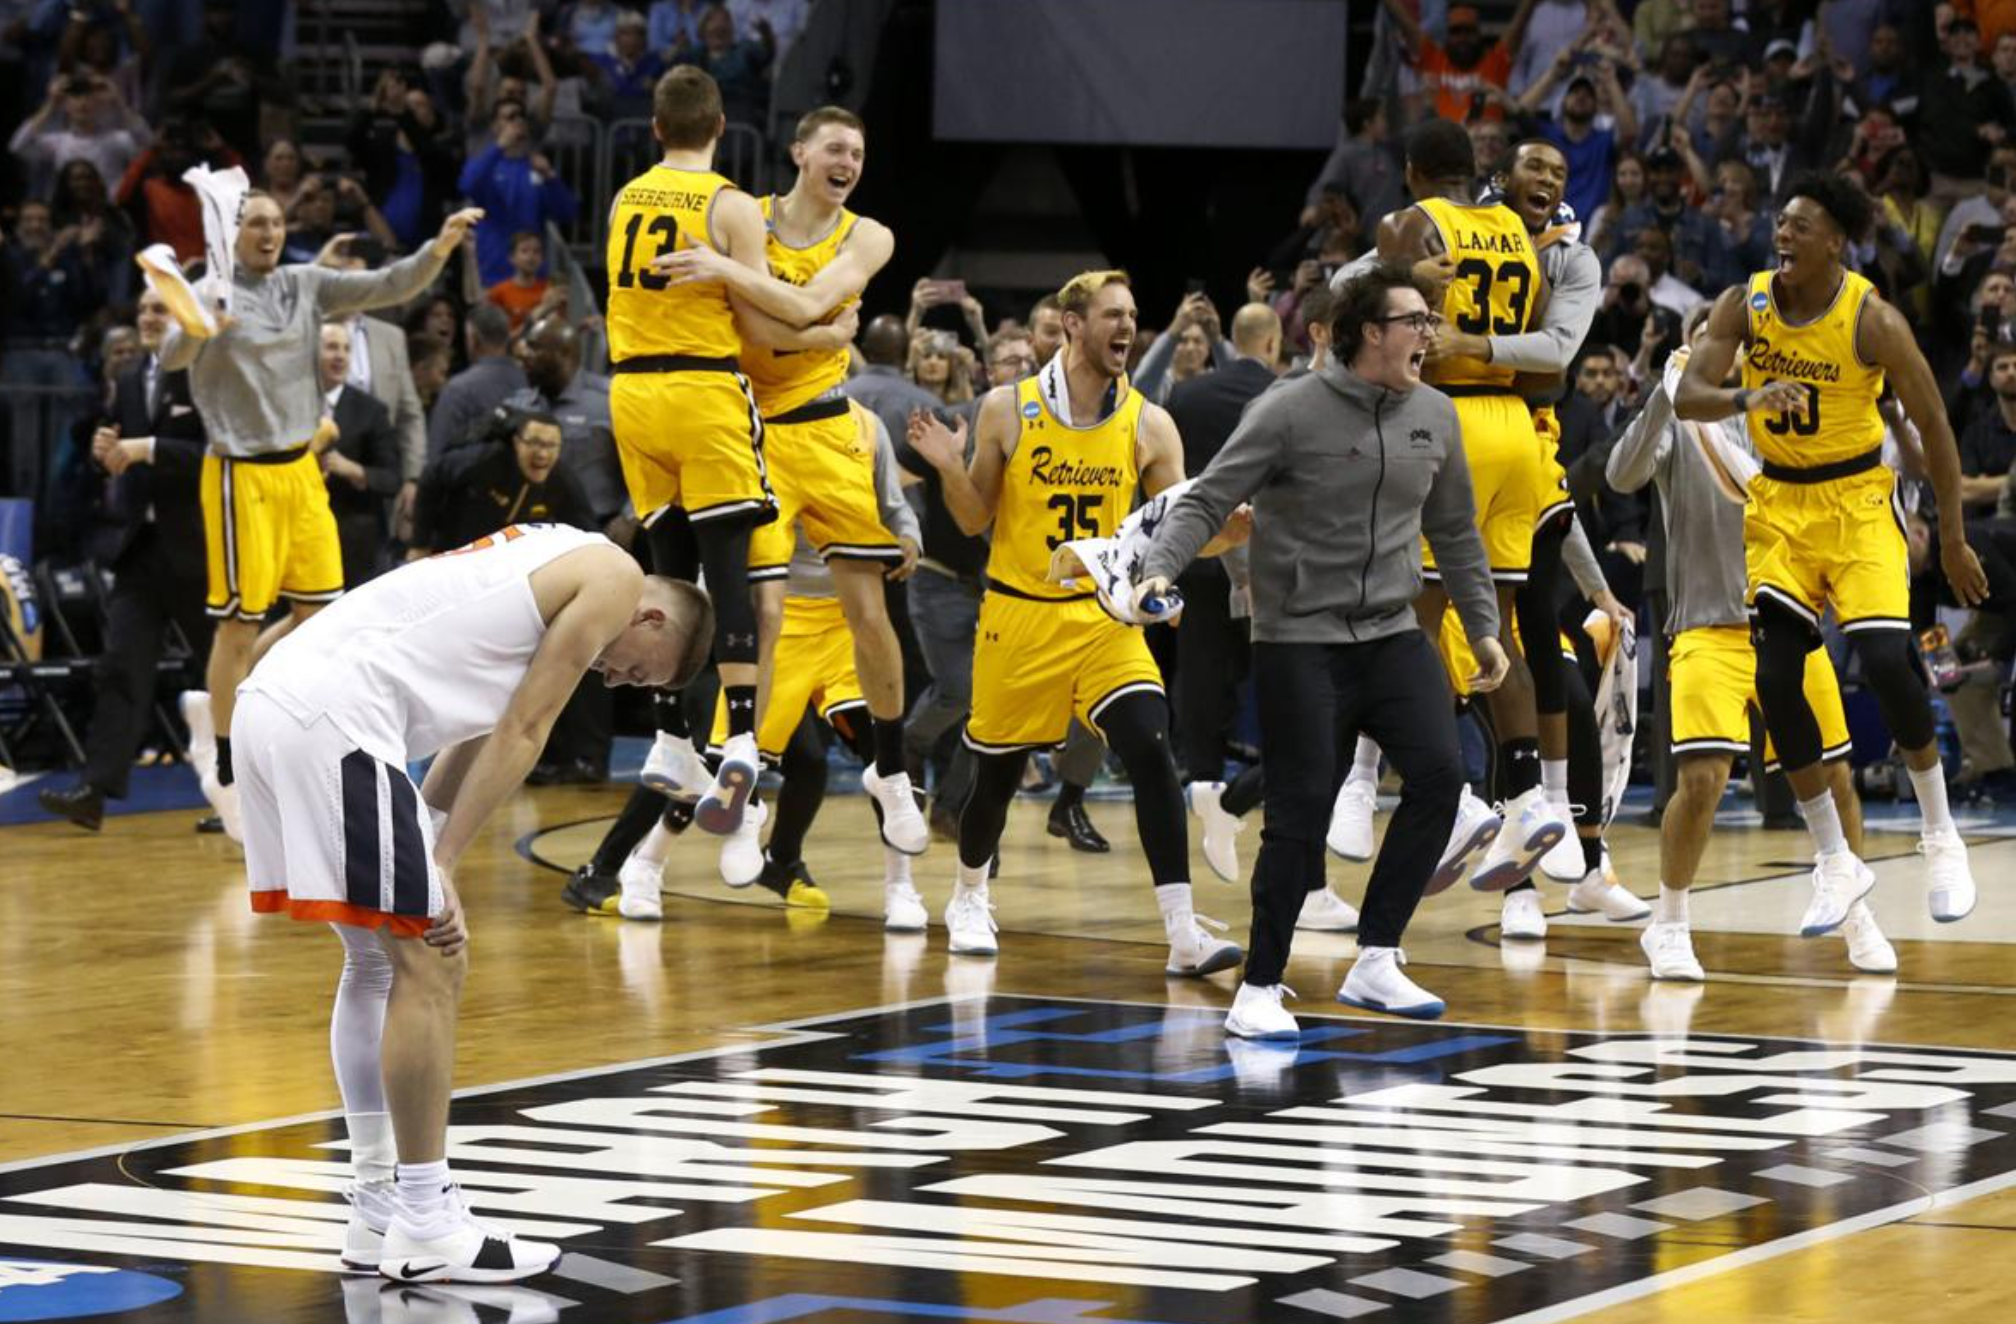

In [14]:
Image(filename='./images/upset1.png', width=1000)

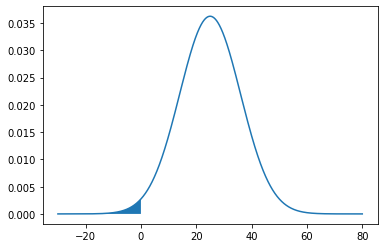

'The probability of the event is: 0.012'

In [7]:
# calculate the probability and plot the area under the normal curve corresponding to the event's proba:
get_single_event_proba(sample_mean=25, sample_std=11, value_to_predict=0)

For the event above, please note that we set **"value_to_predict=0"** since we are interested in the event that the favorite (#1 seed Virginia) has a point differential over #16 seed UMBC of zero points or less. Meaning, the probability that they don't win. Remember, the distribution models the point differential between teams, with the mean representing the average margin of victory by the favorite.

As the result shows, the probability of observing an upset such as the one in 2018 was just over one percent!

---
### Case 2:  The Jets win Superbowl III
In 1969, the Jets defeated the Colst to win the 18-point-favorite Colts. The standard deviation of the margin in an NFL game about the point spread was 14 points. Using these parameters (mean = 18, std = 14) we can model the probability of the upset by employing a normal random variable.

How likely was the result observed?

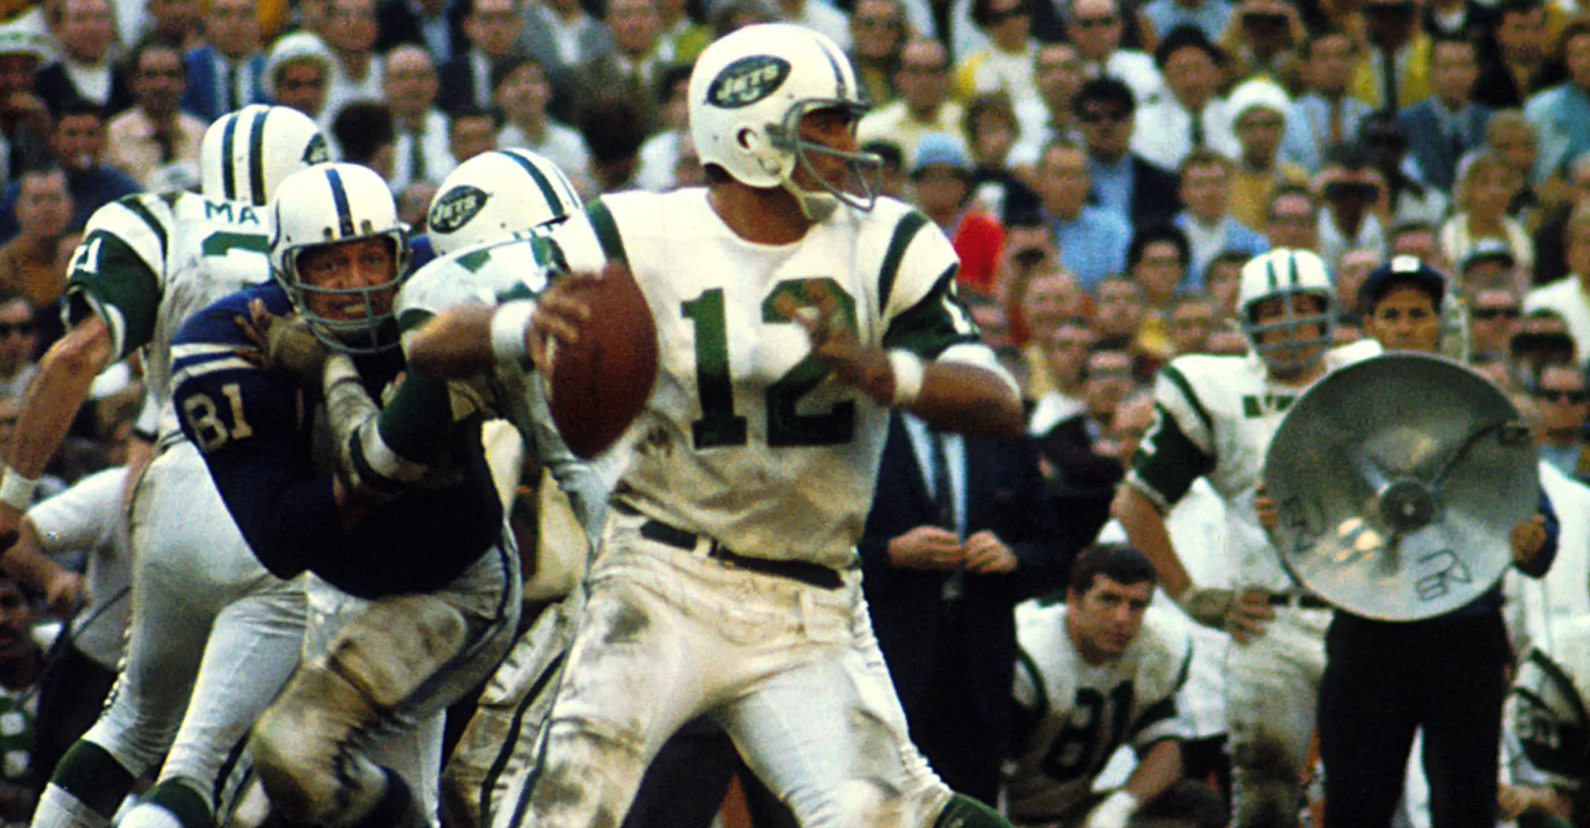

In [12]:
Image(filename='./images/upset2.png', width=1000)

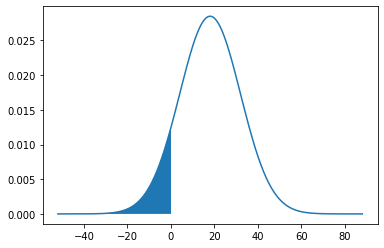

'The probability of the event is: 0.099'

In [8]:
# calculate the probability and plot the area under the normal curve corresponding to the event's proba:
get_single_event_proba(sample_mean=18, sample_std=14, value_to_predict=0)

The Jets roughly a 10 percent chance of winning the superbowl. As the previous example, we set **"value_to_predict=0"** as we are interested in the event that the Colts margin of victory is 0 points or less.

---